# Analysis of Airbnb 

## Background and Objective

Airbnb was established in 2008. As a community platform product, airbnb has operations in 191 countries and it develops fastly in recent several years. Here, let's explore whether we can provide some insights for airbnb to make improvements based on the following tree points.

    1)User profile analysis
    2)Traffic channel analysis
    3)Conversion funnel analysis

## Data Processing

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
#import data 
df = pd.read_csv('train_users_2.csv')
df_sessions = pd.read_csv('sessions.csv')

In [4]:
#check null value, duplicate value and Outliers

df.describe()
df.info()
# date_first_booking, age and first_affiliate_tracked these three variables have some null vales
# the null values of date_first_booking means these users don't make any order yet.

df.id.unique().size
#No duplicate records in this dataset

age_bins = np.arange(0,2014,100)
df_cut = pd.cut(df.age, age_bins).value_counts()
pd.set_option('display.max_rows',None)
df_cut
# The values over 100 is unreasonable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


(0, 100]        123116
(100, 200]        1566
(1900, 2000]        29
(1600, 1700]         0
(700, 800]           0
(1700, 1800]         0
(200, 300]           0
(300, 400]           0
(400, 500]           0
(500, 600]           0
(600, 700]           0
(800, 900]           0
(1500, 1600]         0
(1800, 1900]         0
(1000, 1100]         0
(1100, 1200]         0
(1200, 1300]         0
(1300, 1400]         0
(1400, 1500]         0
(900, 1000]          0
Name: age, dtype: int64

## Data Analyzing

1) User profile analysis

a)Age distribution

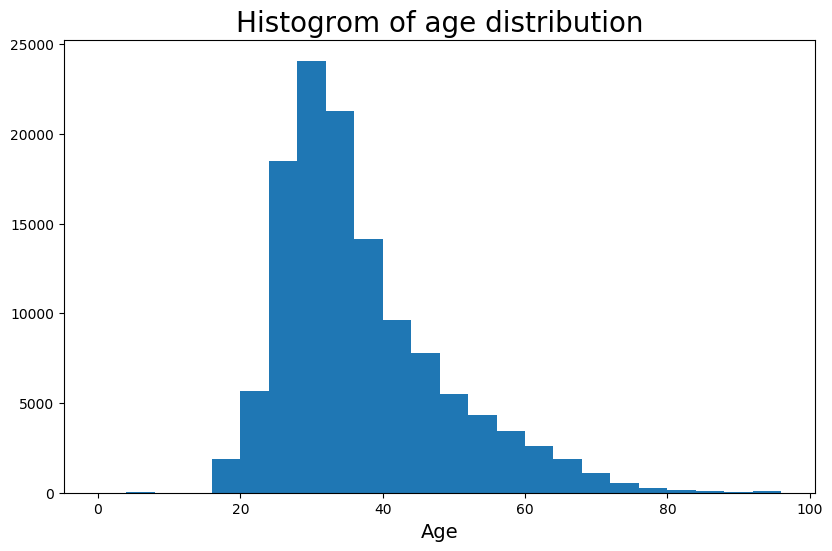

In [5]:
age_bins = np.arange(0,100,4)
df_cut = pd.cut(df.age, age_bins).value_counts()
plt.figure(figsize=(9.7,6),dpi=100)
plt.hist(df['age'],age_bins)
plt.xlabel('Age',size='14')
plt.title('Histogrom of age distribution',size = 20)
plt.show()

Most of users belong to the young and middle-aged group. Most of them are from 20 years old to 40 years old.

b)Gender distribution

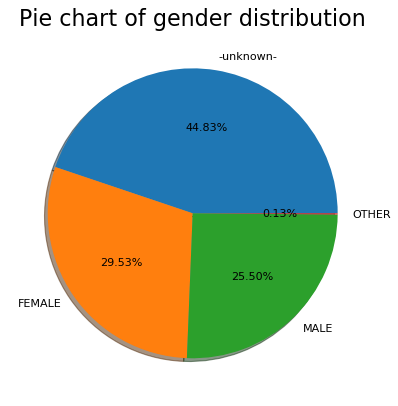

In [6]:
user_gender = df.groupby('gender').count()['id'].sort_values(ascending=False)
user_gender

plt.figure(figsize =(9,6),dpi=80)
plt.pie(x=user_gender.values,labels=user_gender.index,autopct='%2.2f%%',shadow=True)
plt.title('Pie chart of gender distribution',size = 20)
plt.show()

According to the gender pie chart, most of users don't want to show their age. 29.53% of the total users are female, and 25.5% of the total are male users. The ratio of female vs male is 1:1.16.

c)Region distribution

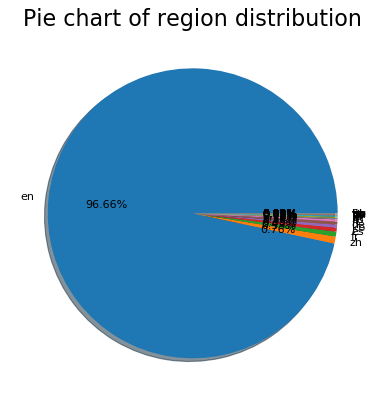

In [7]:
user_country = df.groupby('language').count()['id'].sort_values(ascending = False)
#user_country

plt.figure(figsize = (9,6),dpi=80)
plt.pie(x=user_country.values,labels=user_country.index,autopct='%2.2f%%',shadow=True)
plt.title('Pie chart of region distribution',size=20)
plt.show()

According to the result, most of the users are from the English-speaking countries. The reason is records in this dataset are before 2014, however, Airbnb entered Chinese market since 2014.

2) Traffic channel analysis

a)New users per month

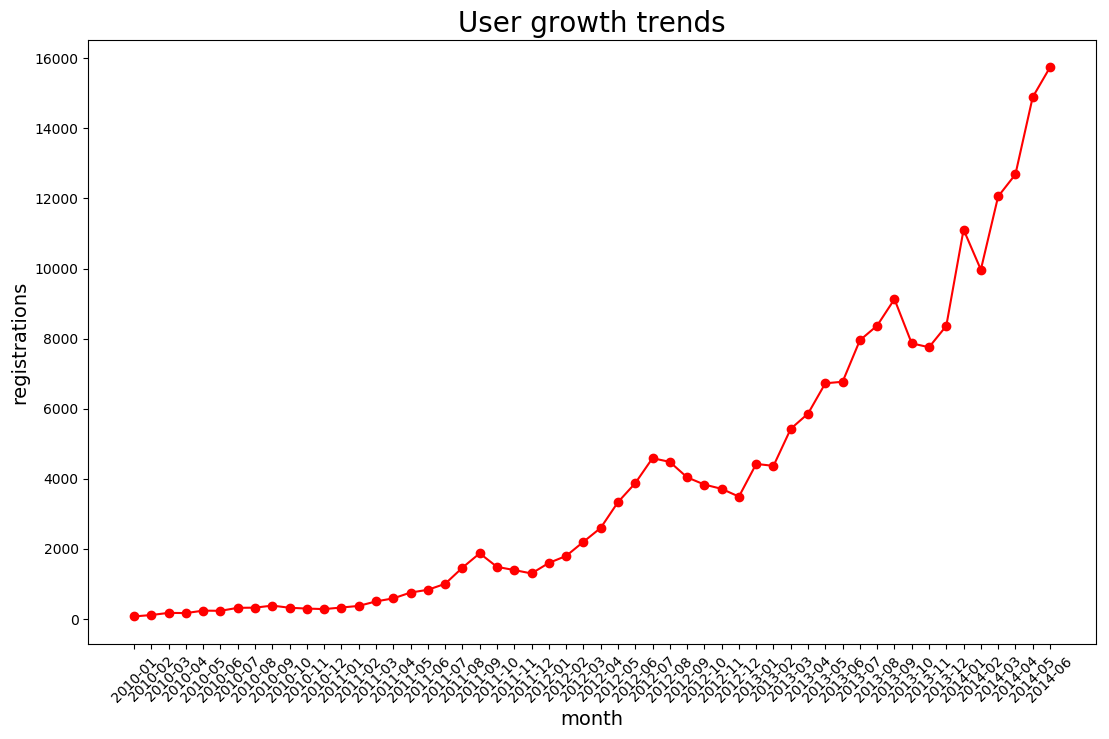

In [8]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'],format='%Y-%m-%d') 
df['month'] = df['date_account_created'].dt.strftime('%Y-%m')
df_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(13,8),dpi=100)
plt.plot(df_month,'o-',color = 'r',label="CNN-RLSTM")
plt.xlabel("month",size=14)
plt.xticks(rotation=45)
plt.ylabel("registrations",size=14)
plt.title('User growth trends',size=20)
plt.show()

Until 2011-03, the user growth trends is stable. Since 2012-02, the number of new users grows rapidly. Plus, it is obvious that there is a seasonal trends: there is a peak of new users growth bwtween Junly and October in each year.

b)Registrations and convertion of each affiliate

In [9]:
visit = df.groupby(["first_affiliate_tracked"])["id"].count()
booking = df.groupby(["first_affiliate_tracked"])["date_first_booking"].count()


visit = visit.to_frame(name='count(visit)')
booking = booking.to_frame(name='count(booking)')
df_vb = pd.merge(visit,booking,on='first_affiliate_tracked')
df_vb['Proportion'] =df_vb["count(booking)"]/df_vb["count(visit)"]
df_vb = df_vb.sort_values('count(visit)',ascending=False)
df_vb['first_affiliate_tracked'] = df_vb.index
df_vb

,count(visit),count(booking),Proportion,first_affiliate_tracked
first_affiliate_tracked,,,,
untracked,109232,47739,0.437042,untracked
linked,46287,20102,0.434290,linked
omg,43982,16425,0.373448,omg
tracked-other,6156,2290,0.371995,tracked-other
product,1556,542,0.348329,product
marketing,139,63,0.453237,marketing
local ops,34,9,0.264706,local ops


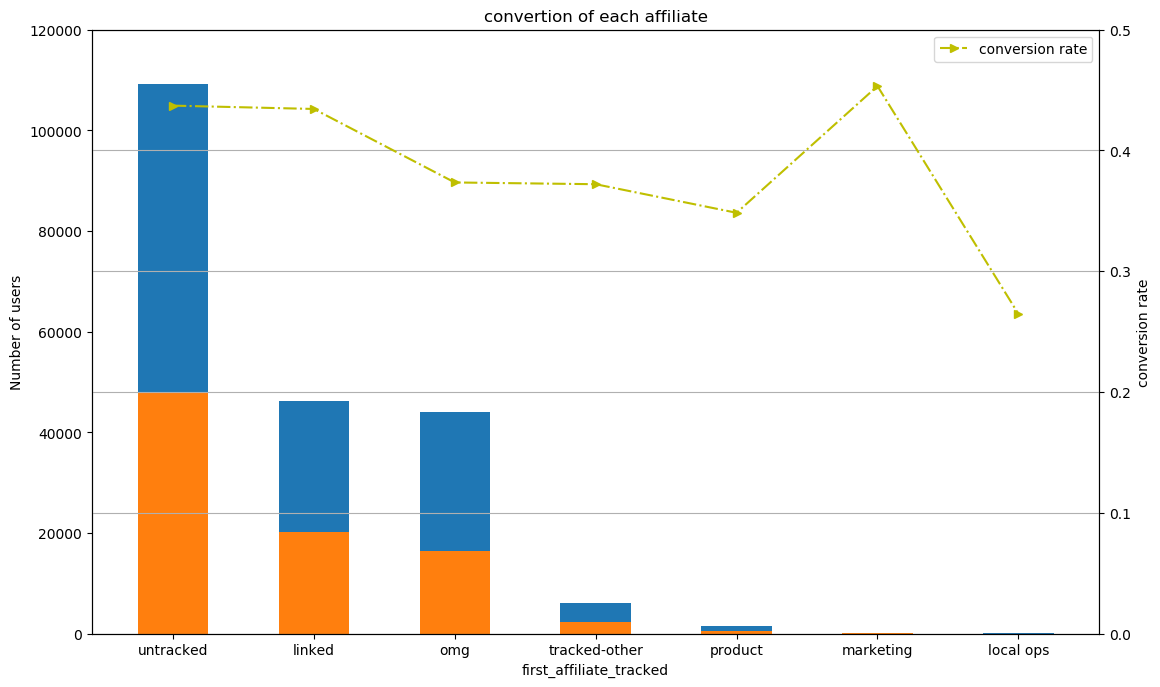

In [15]:
fig = plt.figure(figsize=(13,8),dpi=100)
ax1 = fig.add_subplot(111)

the_number_of_visit = plt.bar(df_vb['first_affiliate_tracked'],df_vb['count(visit)'],width=0.5)
the_number_of_book = plt.bar(df_vb['first_affiliate_tracked'],df_vb['count(booking)'],width=0.5)


plt.xlabel('first_affiliate_tracked')             
ax1.set_yticks(np.arange(0,140000,20000))       
ax1.set_ylabel('Number of users')                  


ax2 = ax1.twinx()
df_vb['Proportion'].plot(ax=ax2,grid=True,label='conversion rate',style='y>-.')
ax2.set_yticks(np.arange(0,0.55,0.1))  
ax2.set_ylabel('conversion rate')       
plt.legend(loc=1)              
plt.title('convertion of each affiliate')   

plt.show()

c)Conversion in each channel

In [20]:
df["channel-provider"] = df["affiliate_channel"].str.cat(df["affiliate_provider"],sep ="-")
visit = df.groupby(["channel-provider"])["id"].count()
booking = df.groupby(["channel-provider"])["date_first_booking"].count()

rate = booking/visit
visit= visit.sort_values(ascending=False).reset_index()
booking=booking.sort_values(ascending=False).reset_index()
rate=rate.sort_values(ascending=False).reset_index()
df_vbr = pd.merge(visit,rate,on='channel-provider',how='left')
df_vbr = pd.merge(df_vbr,booking,on='channel-provider',how='left')
df_vbr.columns = ['channel-provider','visit','rate','booking']
df_vbr = df_vbr.sort_values(by='visit',ascending=False)[:10]
df_vbr

,channel-provider,visit,rate,booking
0,direct-direct,137426,0.431025,59234
1,sem-brand-google,25069,0.427021,10705
2,sem-non-brand-google,16947,0.384493,6516
3,api-other,8167,0.341006,2785
4,seo-google,5691,0.481286,2739
5,other-other,3656,0.412473,1508
6,other-craigslist,3471,0.465572,1616
7,content-google,2892,0.155947,451
8,seo-facebook,1677,0.431723,724
9,remarketing-google,1094,0.336380,368


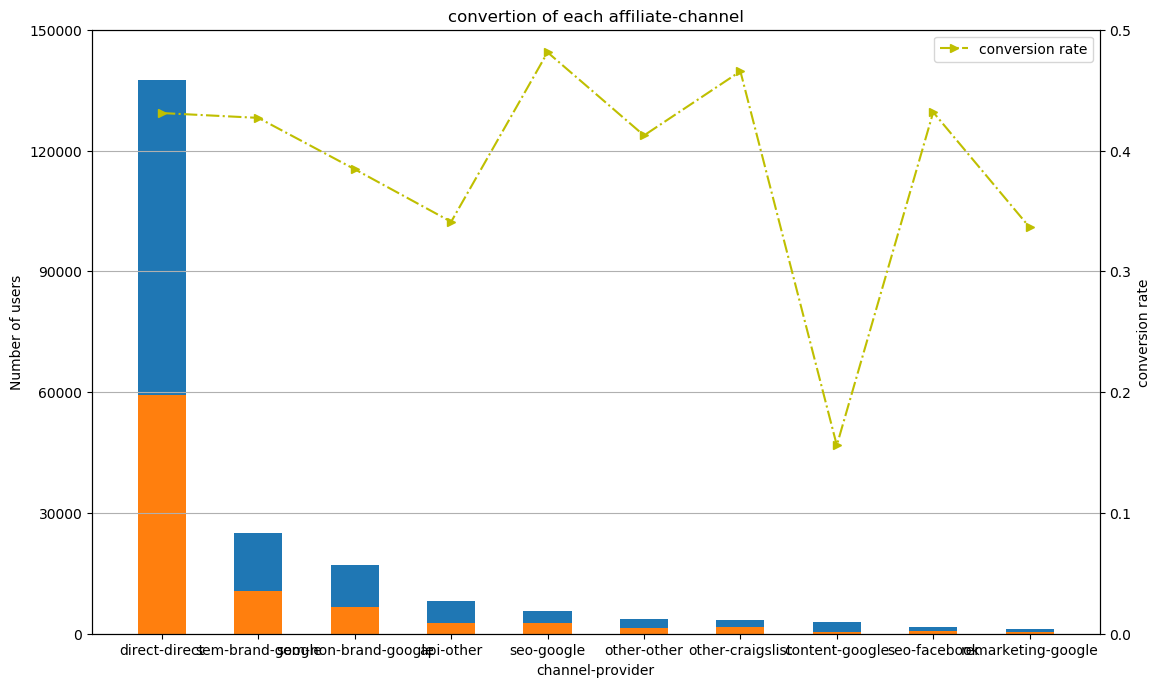

In [22]:
fig = plt.figure(figsize=(13,8),dpi=100)
ax1 = fig.add_subplot(111)

the_number_of_visit2 = plt.bar(df_vbr['channel-provider'],df_vbr['visit'],width=0.5)
the_number_of_book2 = plt.bar(df_vbr['channel-provider'],df_vbr['booking'],width=0.5)


plt.xlabel('channel-provider')             
ax1.set_yticks(np.arange(0,155000,30000))       
ax1.set_ylabel('Number of users')                  


ax2 = ax1.twinx()
df_vbr['rate'].plot(ax=ax2,grid=True,label='conversion rate',style='y>-.')
ax2.set_yticks(np.arange(0,0.55,0.1))  
ax2.set_ylabel('conversion rate')       
plt.legend(loc=1)              
plt.title('convertion of each affiliate-channel')   

plt.show()

Generally speaking, the conversion rate in each channel performs well, which is over 30%. However, we need to pay maore attention on the content_google and api_other. The former one is lower than all the others, and the later one is also lower than the average.  

d)Device type

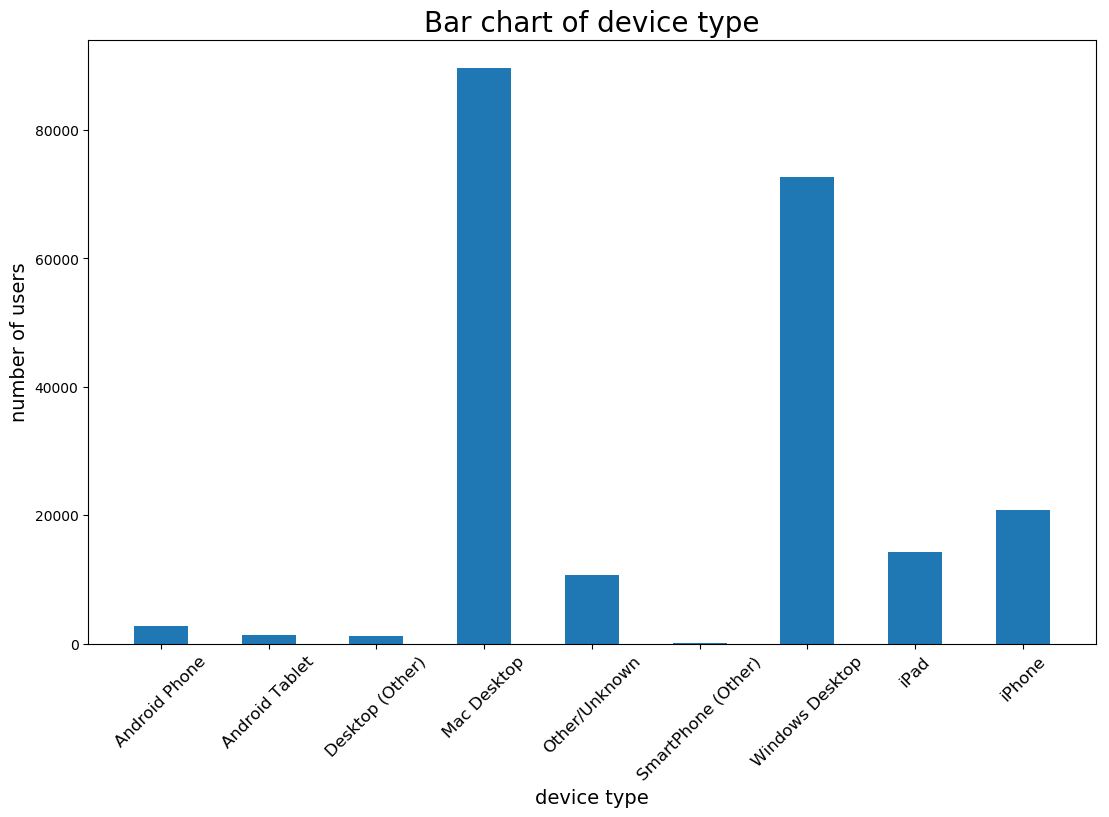

In [59]:
user_device_type = df.groupby('first_device_type',as_index=False).count()[['first_device_type','id']]
user_device_type.rename(columns={'id':'device_type_count'},inplace = True)
user_device_type

plt.figure(figsize=(13,8),dpi=100)
user_device_bar = plt.bar(user_device_type['first_device_type'],user_device_type['device_type_count'],width=0.5)
plt.xticks(rotation=45,size=12)
plt.xlabel('device type',size=14)
plt.ylabel("number of users",size=14)
for b in user_device_bar:
    height = b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height+0.8,str(height),ha='center',size=12)
plt.title('Bar chart of device type',size=20)
plt.show()

3) Conversion funnel analysis

In [27]:
all_user = users_sum.count()

In [59]:
#all the users
users_sum = df_sessions.groupby(["user_id"])["user_id"].count()

all_user = users_sum.count()
#active users
active_user = users_sum[users_sum>=10].count()
#sign up users
df_all = pd.merge(df_sessions,df,left_on="user_id",right_on="id")
signup_user = df_all.groupby(["user_id"])["user_id"].count().count()
#users who make an order
order_user = df_sessions.loc[df_sessions["action_detail"]=="reservations"]
order_user = order_user.groupby("user_id")["user_id"].count().count()
#users make payment
pay_user = df_sessions[df_sessions['action_detail']=='payment_instruments'].groupby('user_id').count().shape[0]
pays_user = df_sessions[df_sessions['action_detail']=='payment_instruments'].groupby('user_id')['user_id'].count()
#users repurchase
pays_user = pays_user[pays_user>=2].count()

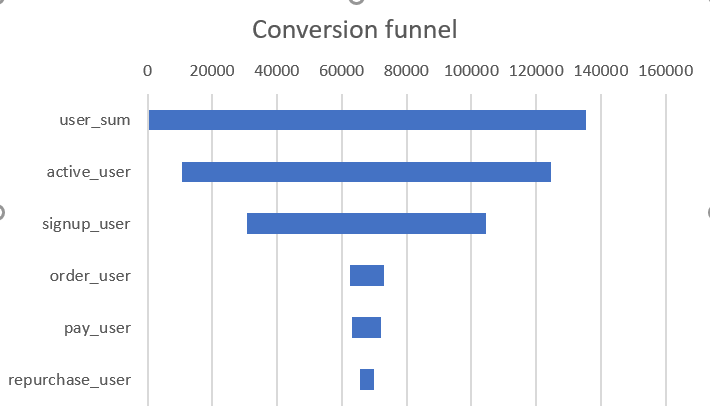

In [68]:
from IPython.display import Image
Image(filename = 'ConversionFunnel.png', width=800, height = 800)

From registered users to users who make order is the link with the highest churn rate in the airbnb conversion funnel. Active and repurchase links perform well, with 60% of users who repurchase, indicating that airbnb's products and services are doing very well. About 13% of the users who placed the order did not make payment, and we'd make further investigation here.

# Conclusion

1) User profile analysis

a)Considing gender of users, the number male users is larger the number of female users, but the difference is small (7.3% gap).

b)Considering the age group, users are mainly young and middle-aged. Most of users are 29-33 years old. 

c)The region with the largest number of users is Europe and America, followed by China, but the proportion of Europe and America is more than 90%.

d)According to the distribution of age, when airbnb make invest on SEO or advertising, the mainly target of delivery is refined to male aged 29 to 39 years old.

2) Traffic channel analysis

a)The early period (before 2011) was flat, and then (after January 2012) began to grow rapidly, and the speed is very fast.

b)July to October is the peak season for travel, and this is also the peak season for the growth of airbnb users.

c)Most users use Apple devices. And most registrations are from direct download, accounting for 64.38% of the total registrations.

d)In the main channels, the conversion rate of content_google is abnormal, which is significantly lower than the average conversion rate. The conversion rate of api_other channels is also relatively low.

e)The conversion rates under content promotion in all the channels are pretty low, and the conversion rate of content_gsp is only 8.2%. The conversion rates of sem-non-brand_bing and sem-non-brand_vast are low.

3) Conversion funnel analysis

a)The highest churn rates of the conversion funnel is "users place orders", with only 14% of users placing orders.

b)About 13% of the users who placed the order did not pay successfully in the end.

c)The registration rate still needs to be improved.

d)The active and repurchase performed well, indicating that airbnb's products and services are doing very well

4) Suggestions

a)From July to October is the peak season for business. The Operation and Department Strategy Department can launch more marketing event from July to October every year, and invest more on the advertising.

b)The content_google conversion rate is very low (only 15%) in the main channels (the channels with the top 7 registrations). It is recommended that the operation department calculate the *ROI and ARPU (average revenue per customer) of this channel. If the ROI is too low, it is recommended to stop The delivery of this channel.

c)The promotion and conversion of all channels in each SEO perform well. SEO is a lower-cost way of acquiring customers (mainly labor cost). we recommend that airbnb should give more supports on SEO-related investment, and even consider expanding SEO team.